<a href="https://colab.research.google.com/github/aasimkabir/Data-Science-Project/blob/main/FinalWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import drive

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import sys

import cv2
%matplotlib inline

In [ ]:
import nltk
nltk.download('all') 


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [ ]:
nltk.data.path

['/root/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data',
 '/usr/nltk_data',
 '/usr/lib/nltk_data']

In [ ]:
from nltk.corpus import PlaintextCorpusReader

In [ ]:
input_data = pd.read_csv("gdrive/My Drive/Data_sets/ISEAR_DS.csv") 

In [ ]:
input_data.shape

(7515, 3)

In [ ]:
input_data.columns

Index(['joy',
       'On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.',
       'Unnamed: 2'],
      dtype='object')

In [ ]:
input_data.head(100)

,joy,On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.,Unnamed: 2
0,fear,Every time I imagine that someone I love or I ...,NaN
1,anger,When I had been obviously unjustly treated and...,NaN
2,sadness,When I think about the short time that we live...,NaN
3,disgust,At a gathering I found myself involuntarily si...,NaN
4,shame,When I realized that I was directing the feeli...,NaN
...,...,...,...
95,sadness,Last year when I worked during the Summer holi...,NaN
96,disgust,When a dog is left whining outside a shop.,NaN
97,shame,When I promised to help a friend over a weeken...,NaN
98,guilt,When I realized that I had three more examinat...,NaN


In [ ]:
input_data.rename(columns = {"class": "joy", 
                                  "text":"On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.", 
                                  "Unmaed": "Unnamed: 2"})

,joy,On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.,Unnamed: 2
0,fear,Every time I imagine that someone I love or I ...,NaN
1,anger,When I had been obviously unjustly treated and...,NaN
2,sadness,When I think about the short time that we live...,NaN
3,disgust,At a gathering I found myself involuntarily si...,NaN
4,shame,When I realized that I was directing the feeli...,NaN
...,...,...,...
7510,shame,Two years back someone invited me to be the tu...,NaN
7511,shame,I had taken the responsibility to do something...,NaN
7512,fear,I was at home and I heard a loud sound of spit...,NaN
7513,guilt,I did not do the homework that the teacher had...,NaN


In [ ]:
input_data.columns = ["sentiment","text","Unnamed"]

In [ ]:
input_data.head(100)

,sentiment,text,Unnamed
0,fear,Every time I imagine that someone I love or I ...,NaN
1,anger,When I had been obviously unjustly treated and...,NaN
2,sadness,When I think about the short time that we live...,NaN
3,disgust,At a gathering I found myself involuntarily si...,NaN
4,shame,When I realized that I was directing the feeli...,NaN
...,...,...,...
95,sadness,Last year when I worked during the Summer holi...,NaN
96,disgust,When a dog is left whining outside a shop.,NaN
97,shame,When I promised to help a friend over a weeken...,NaN
98,guilt,When I realized that I had three more examinat...,NaN


In [ ]:
input_data['Unnamed']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7510    NaN
7511    NaN
7512    NaN
7513    NaN
7514    NaN
Name: Unnamed, Length: 7515, dtype: object

In [ ]:
data = input_data.drop(['Unnamed'], axis = 1)

In [ ]:
data.shape

(7515, 2)

In [ ]:
data 

,sentiment,text
0,fear,Every time I imagine that someone I love or I ...
1,anger,When I had been obviously unjustly treated and...
2,sadness,When I think about the short time that we live...
3,disgust,At a gathering I found myself involuntarily si...
4,shame,When I realized that I was directing the feeli...
...,...,...
7510,shame,Two years back someone invited me to be the tu...
7511,shame,I had taken the responsibility to do something...
7512,fear,I was at home and I heard a loud sound of spit...
7513,guilt,I did not do the homework that the teacher had...


In [ ]:
data['sentiment'].value_counts()

joy        1091
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: sentiment, dtype: int64

In [ ]:
data.columns.values

array(['sentiment', 'text'], dtype=object)

In [ ]:
data

,sentiment,text
0,fear,Every time I imagine that someone I love or I ...
1,anger,When I had been obviously unjustly treated and...
2,sadness,When I think about the short time that we live...
3,disgust,At a gathering I found myself involuntarily si...
4,shame,When I realized that I was directing the feeli...
...,...,...
7510,shame,Two years back someone invited me to be the tu...
7511,shame,I had taken the responsibility to do something...
7512,fear,I was at home and I heard a loud sound of spit...
7513,guilt,I did not do the homework that the teacher had...


In [ ]:
raw_data = np.array(data['text'])

In [ ]:
raw_data

array(['Every time I imagine that someone I love or I could contact a  \nserious illness, even death.',
       'When I had been obviously unjustly treated and had no possibility  \nof elucidating this.',
       'When I think about the short time that we live and relate it to  \nthe periods of my life when I think that I did not use this  \nshort time.',
       ...,
       'I was at home and I heard a loud sound of spitting outside the  \ndoor.  I thought that one of my family members would step on the spit  \nand bring the germs in the house.',
       'I did not do the homework that the teacher had asked us to do.  I  \nwas scolded immediately.',
       'I had shouted at my younger brother and he was always afraid when  \nI called out loudly.'],
      dtype=object)

In [ ]:
len(raw_data)

7515

Text(0, 0.5, 'Frequency')

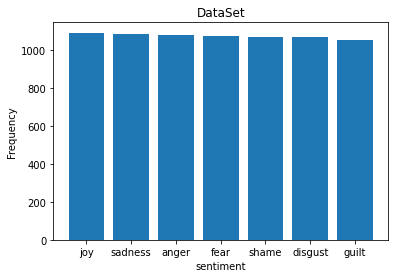

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
value  = data['sentiment'].value_counts() 
# get x and y data 
points = value.index 
frequency = value.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('DataSet') 
ax.set_xlabel('sentiment') 
ax.set_ylabel('Frequency')

In [ ]:
value

joy        1091
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: sentiment, dtype: int64

In [ ]:
emotion_labels = ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt']

In [ ]:
#data.drop(["guit"], inplace = True) 
data
  

,sentiment,text
0,fear,Every time I imagine that someone I love or I ...
1,anger,When I had been obviously unjustly treated and...
2,sadness,When I think about the short time that we live...
3,disgust,At a gathering I found myself involuntarily si...
4,shame,When I realized that I was directing the feeli...
...,...,...
7510,shame,Two years back someone invited me to be the tu...
7511,shame,I had taken the responsibility to do something...
7512,fear,I was at home and I heard a loud sound of spit...
7513,guilt,I did not do the homework that the teacher had...


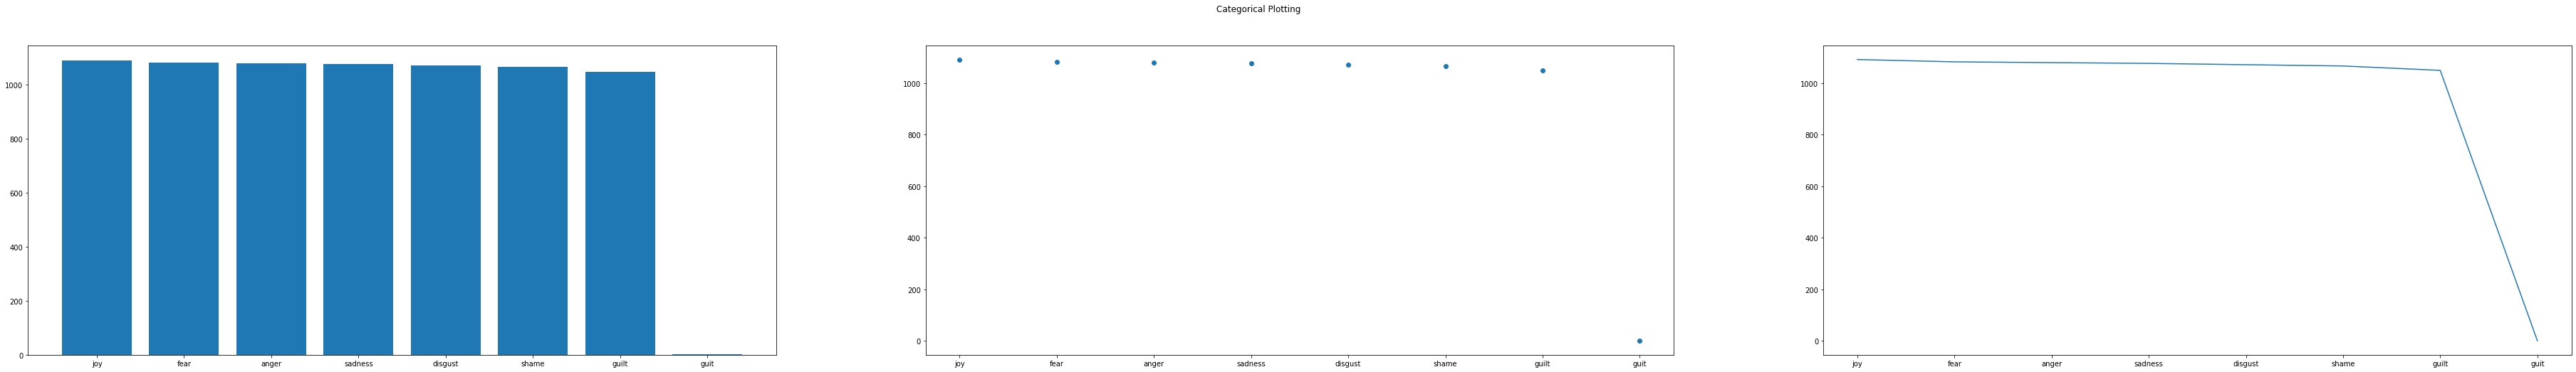

In [ ]:
names = ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt','guit']
values = [1091,1082,1079,1076,1071,1066,1049,1]

plt.figure(figsize=(64, 8))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()
  

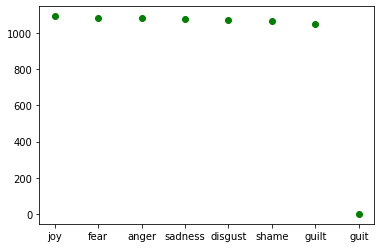

In [ ]:
plt.plot(names, values,'go')

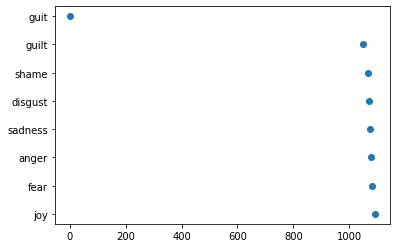

In [ ]:
plt.scatter(values,names)


In [ ]:
names = ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt','guit']
classInt = [1,2,3,4,5,6,7,8];


In [ ]:
names = ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt','guit']
  
# Printing original list 
print ("Original list is : " + str(names)) 
  
# using naive method to 
# perform conversion 
for i in range(0, len(names)): 
    names[i] = classInt[i] 
      
  
# Printing modified list  
print ("Modified list is : " + str(names)) 


Original list is : ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'guit']
Modified list is : [1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
value

joy        1091
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: sentiment, dtype: int64

In [ ]:
data.values[0:10]

array([['fear',
        'Every time I imagine that someone I love or I could contact a  \nserious illness, even death.'],
       ['anger',
        'When I had been obviously unjustly treated and had no possibility  \nof elucidating this.'],
       ['sadness',
        'When I think about the short time that we live and relate it to  \nthe periods of my life when I think that I did not use this  \nshort time.'],
       ['disgust',
        'At a gathering I found myself involuntarily sitting next to two  \npeople who expressed opinions that I considered very low and  \ndiscriminating.'],
       ['shame',
        'When I realized that I was directing the feelings of discontent  \nwith myself at my partner and this way was trying to put the blame  \non him instead of sorting out my own feeliings.'],
       ['guilt',
        'I feel guilty when when I realize that I consider material things  \nmore important than caring for my relatives.  I feel very  \nself-centered.'],
       ['joy',
     

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer()
dtm_v1 = pd.DataFrame(countvec1.fit_transform(data['text']).toarray(), columns=countvec1.get_feature_names(), index=None)
dtm_v1['sentiment'] = data['sentiment']
dtm_v1.head(10)

,00,000,10,100,1000,102,10t,10th,10yrs,11,110km,11th,12,120,12th,13,13th,14,140,1400,15,150,1500,16,17,18,180側,18th,19,1960,1966,1968,1970,1972,1975,1976,1977,1978,1979,1980,...,yield,yielding,york,you,young,younger,youngest,youngish,youngsters,youngstters,your,yournals,yours,yourself,youth,youths,yr,yrs,yugoslavia,yukky,zagging,zaire,zalu,zambezi,zambia,zealand,zealander,zeeland,zemba,zero,zesco,zhu,zig,zip,zipper,zomba,zombies,zone,zoophiliac,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fear
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,anger
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sadness
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,disgust
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,shame
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,guilt
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,joy
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fear
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,anger
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sadness


In [ ]:
dtm_v1.shape

(7515, 8953)

**Refining DTM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import re
import nltk

In [ ]:
stemmer = PorterStemmer()
#from nltk.stem import WordNetLemmatizer 
#lemmatizer = WordNetLemmatizer() 
def tokenize(text):
    text = stemmer.stem(text)               #stemming
   # text = [word for word in text if not word in stop_words] #English Stopwords
    #text = [lemmatizer.lemmatize(word) for word in text]  #Lemmatising
    text = re.sub(r'\W+|\d+|_', ' ', text)    #removing numbers and punctuations and Underscores
    tokens = nltk.word_tokenize(text)       #tokenizing
    return tokens
countvec = CountVectorizer(min_df= 5, tokenizer=tokenize, stop_words=stopwords.words('english'))
dtm = pd.DataFrame(countvec.fit_transform(data['text']).toarray(), columns=countvec.get_feature_names(), index=None)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'r', 'themselv', 'thi', 'v', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
countvec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x7ff4121dd598>,
                vocabulary=None)

In [ ]:
dtm.shape

(7515, 2102)

In [ ]:
dtm

,abilities,ability,able,abortion,abroad,absence,absent,absolutely,abused,abusing,academic,accept,acceptance,accepted,accident,accidentally,accomodation,accompanied,accomplish,account,accused,achieve,achieved,acquaintance,across,act,acted,acting,action,actions,activities,acts,actually,admission,admit,admitted,advances,advantage,advice,affair,...,witnessed,woke,woman,women,wonderful,wondering,wood,word,words,wore,work,worked,worker,working,world,worms,worried,worry,worse,worst,would,wound,wristwatch,write,writing,written,wrong,wrongly,wrote,yard,year,years,yelled,yesterday,yet,young,younger,yrs,z,zambia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
7511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Adding label Column
dtm['sentiment'] = data['sentiment']

dtm.head(100)

,abilities,ability,able,abortion,abroad,absence,absent,absolutely,abused,abusing,academic,accept,acceptance,accepted,accident,accidentally,accomodation,accompanied,accomplish,account,accused,achieve,achieved,acquaintance,across,act,acted,acting,action,actions,activities,acts,actually,admission,admit,admitted,advances,advantage,advice,affair,...,woke,woman,women,wonderful,wondering,wood,word,words,wore,work,worked,worker,working,world,worms,worried,worry,worse,worst,would,wound,wristwatch,write,writing,written,wrong,wrongly,wrote,yard,year,years,yelled,yesterday,yet,young,younger,yrs,z,zambia,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fear
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,anger
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sadness
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,disgust
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,shame
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,sadness
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,disgust
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,shame
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,guilt


In [ ]:
dtm.shape

(7515, 2103)

**DTM dataset splitting into Test and Train**

In [ ]:
df_train = dtm[:5250]
df_test = dtm[2250:]

# **Classification On ISEAR Dataset**

# **Naive bayes**
**MultinomialNB**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
X_train= df_train.drop(['sentiment'], axis=1) 

In [ ]:
clf.fit(X_train, df_train['sentiment'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#X_train= df_train.drop(['sentiment'], axis=1) 
clf.score(X_train,df_train['sentiment'])*100


73.84761904761905

In [ ]:
X_test= df_test.drop(['sentiment'], axis=1)
clf.score(X_test,df_test['sentiment'])*100

66.21082621082621

In [ ]:
pred_sentiment=clf.predict(df_test.drop('sentiment', axis=1))
print(pred_sentiment)

['fear' 'anger' 'sadness' ... 'fear' 'shame' 'fear']


In [ ]:
pred_sentiment.shape

(5265,)

In [ ]:
pred_sentiment

array(['fear', 'anger', 'sadness', ..., 'fear', 'shame', 'fear'],
      dtype='<U7')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
X6 = dtm.drop(['sentiment'], axis=1)
Y6 = dtm['sentiment']
X_train6, X_test6, Y_train6, Y_test6 = model_selection.train_test_split(X6, Y6, test_size=0.25, random_state=0)
model6 = MultinomialNB()
model6.fit(X_train6, Y_train6)
predicted6 = model6.predict(X_test6)
matrix6 = confusion_matrix(Y_test6, predicted6)
acc6 = accuracy_score(Y_test6, predicted6)*100
print(acc6)
print(matrix6)

55.56146886641831
[[113  38  14  40  14  14  25]
 [ 32 142  19  20  14  10  25]
 [ 19  11 174  10  24  16  15]
 [ 29  16  15 128  13  22  40]
 [ 12   8  13  15 203  24   6]
 [ 19   8  19  17  28 163  21]
 [ 30  23  16  42  30   9 121]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test6,predicted6))

              precision    recall  f1-score   support

       anger       0.44      0.44      0.44       258
     disgust       0.58      0.54      0.56       262
        fear       0.64      0.65      0.65       269
       guilt       0.47      0.49      0.48       263
         joy       0.62      0.72      0.67       281
     sadness       0.63      0.59      0.61       275
       shame       0.48      0.45      0.46       271

    accuracy                           0.56      1879
   macro avg       0.55      0.55      0.55      1879
weighted avg       0.55      0.56      0.55      1879



# **KNN(K-Nearest Neighbour)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)


In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)

In [ ]:
K_classifier.fit(X_train, df_train['sentiment'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
X_test= df_test.drop(['sentiment'], axis=1)
K_classifier.score(X_test,df_test['sentiment'])*100

45.10921177587844

In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)
K_classifier.score(X_train,df_train['sentiment'])*100

55.352380952380955

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
X7 = dtm.drop(['sentiment'], axis=1)
Y7 = dtm['sentiment']
X_train7, X_test7, Y_train7, Y_test7 = model_selection.train_test_split(X7, Y7, test_size=0.25, random_state=0)
model7 = KNeighborsClassifier()
model7.fit(X_train7, Y_train7)
predicted7 = model7.predict(X_test7)
matrix7 = confusion_matrix(Y_test7, predicted7)
acc7 = accuracy_score(Y_test7, predicted7)*100
print(acc7)
print(matrix7)

29.96274614156466
[[ 47  38  19  31  64  43  16]
 [ 35  73  15  21  56  47  15]
 [ 24  32  74  16  85  28  10]
 [ 38  23  22  58  60  45  17]
 [ 23  19  18  11 173  31   6]
 [ 45  19  15  11  74 105   6]
 [ 28  47  17  30  87  29  33]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test7,predicted7))

              precision    recall  f1-score   support

       anger       0.20      0.18      0.19       258
     disgust       0.29      0.28      0.28       262
        fear       0.41      0.28      0.33       269
       guilt       0.33      0.22      0.26       263
         joy       0.29      0.62      0.39       281
     sadness       0.32      0.38      0.35       275
       shame       0.32      0.12      0.18       271

    accuracy                           0.30      1879
   macro avg       0.31      0.30      0.28      1879
weighted avg       0.31      0.30      0.28      1879



# **Decision Tree**

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Decision_clf = DecisionTreeClassifier()
X_train= df_train.drop(['sentiment'], axis=1)

In [ ]:
Decision_clf.fit(X_train, df_train['sentiment'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
X_test= df_test.drop(['sentiment'], axis=1)
Decision_clf.score(X_test,df_test['sentiment'])*100

77.3599240265907

In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)
Decision_clf.score(X_train,df_train['sentiment'])*100

99.58095238095238

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
X8 = dtm.drop(['sentiment'], axis=1)
Y8 = dtm['sentiment']
X_train8, X_test8, Y_train8, Y_test8 = model_selection.train_test_split(X8, Y8, test_size=0.25, random_state=0)
model8 = DecisionTreeClassifier()
model8.fit(X_train8, Y_train8)
predicted8 = model8.predict(X_test8)
matrix8 = confusion_matrix(Y_test8, predicted8)
acc8 = accuracy_score(Y_test8, predicted8)*100
print(acc8)
print(matrix8)

48.27035657264502
[[ 86  41  16  38  28  17  32]
 [ 25 124  16  40  17  14  26]
 [ 17  13 164  21  20  15  19]
 [ 30  20  24 114  24  18  33]
 [ 16  17  13  22 166  20  27]
 [ 33  11  18  24  24 143  22]
 [ 38  25  24  36  28  10 110]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test8,predicted8))

              precision    recall  f1-score   support

       anger       0.35      0.33      0.34       258
     disgust       0.49      0.47      0.48       262
        fear       0.60      0.61      0.60       269
       guilt       0.39      0.43      0.41       263
         joy       0.54      0.59      0.56       281
     sadness       0.60      0.52      0.56       275
       shame       0.41      0.41      0.41       271

    accuracy                           0.48      1879
   macro avg       0.48      0.48      0.48      1879
weighted avg       0.48      0.48      0.48      1879



# **SVM(Support Vector Machine)**

In [ ]:
from sklearn.svm import SVC

## Using SVC method of svm class to use Support Vector Machine Algorithm from sklearn.svm import SVC


In [ ]:
SVC_classifier = SVC(kernel = 'linear', random_state = 0)
X_train= df_train.drop(['sentiment'], axis=1)

NameError: ignored

In [ ]:
 SVC_classifier.fit(X_train, df_train['sentiment'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
X_test= df_test.drop(['sentiment'], axis=1)

SVC_classifier.score(X_test,df_test['sentiment'])*100

75.0997150997151

In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)
Decision_clf.score(X_train,df_train['sentiment'])*100

99.58095238095238

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
X9 = dtm.drop(['sentiment'], axis=1)
Y9 = dtm['sentiment']
X_train9, X_test9, Y_train9, Y_test9 = model_selection.train_test_split(X9, Y9, test_size=0.25, random_state=0)
model9 = SVC()
model9.fit(X_train9, Y_train9)
predicted9 = model9.predict(X_test9)
matrix9 = confusion_matrix(Y_test9, predicted9)
acc9 = accuracy_score(Y_test9, predicted9)*100
print(acc9)
print(matrix9)

54.01809473124002
[[140  33  15  25  13  12  20]
 [ 48 137  10  21  16   7  23]
 [ 26  17 158  14  19  10  25]
 [ 55   6  22 120  13  12  35]
 [ 36   9  14  10 191   8  13]
 [ 34  13  14  25  23 140  26]
 [ 40  16  14  34  27  11 129]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test9,predicted9))

              precision    recall  f1-score   support

       anger       0.37      0.54      0.44       258
     disgust       0.59      0.52      0.56       262
        fear       0.64      0.59      0.61       269
       guilt       0.48      0.46      0.47       263
         joy       0.63      0.68      0.66       281
     sadness       0.70      0.51      0.59       275
       shame       0.48      0.48      0.48       271

    accuracy                           0.54      1879
   macro avg       0.56      0.54      0.54      1879
weighted avg       0.56      0.54      0.54      1879



# Using SVC method of svm class to use Kernel SVM Algorithm from sklearn.svm import SVC

In [ ]:
SVC_classifier = SVC(kernel = 'rbf', random_state = 0)
X_train= df_train.drop(['sentiment'], axis=1)

NameError: ignored

In [ ]:
SVC_classifier.fit(X_train, df_train['sentiment'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
X_test= df_test.drop(['sentiment'], axis=1)
SVC_classifier.score(X_test,df_test['sentiment'])*100

73.04843304843305

In [ ]:
X_train= df_train.drop(['sentiment'], axis=1)
Decision_clf.score(X_train,df_train['sentiment'])*100

99.58095238095238

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
X10 = dtm.drop(['sentiment'], axis=1)
Y10 = dtm['sentiment']
X_train10, X_test10, Y_train10, Y_test10 = model_selection.train_test_split(X10, Y10, test_size=0.25, random_state=0)
model10 = SVC()
model10.fit(X_train10, Y_train10)
predicted10 = model10.predict(X_test10)
matrix10 = confusion_matrix(Y_test10, predicted10)
acc10 = accuracy_score(Y_test10, predicted10)*100
print(acc10)
print(matrix10)

54.01809473124002
[[140  33  15  25  13  12  20]
 [ 48 137  10  21  16   7  23]
 [ 26  17 158  14  19  10  25]
 [ 55   6  22 120  13  12  35]
 [ 36   9  14  10 191   8  13]
 [ 34  13  14  25  23 140  26]
 [ 40  16  14  34  27  11 129]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test10,predicted10))

              precision    recall  f1-score   support

       anger       0.37      0.54      0.44       258
     disgust       0.59      0.52      0.56       262
        fear       0.64      0.59      0.61       269
       guilt       0.48      0.46      0.47       263
         joy       0.63      0.68      0.66       281
     sadness       0.70      0.51      0.59       275
       shame       0.48      0.48      0.48       271

    accuracy                           0.54      1879
   macro avg       0.56      0.54      0.54      1879
weighted avg       0.56      0.54      0.54      1879



# Ensamble Majority Voting For ISEAR 

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = MultinomialNB()
clf2 = DecisionTreeClassifier()
clf3 = SVC(kernel = 'linear', random_state = 0)

In [ ]:
X = dtm.drop(['sentiment'], axis=1) ## Features
Y = dtm['sentiment'] # Targets (which we want to predict)
#X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
print('5-fold cross validation:\n')
labels = ['Support Vector','Decision Tree','Naive Bayes' ]

5-fold cross validation:



In [ ]:
print('5-fold cross validation:\n')
labels = ['Support Vector Machine', 'Decision Tree','Naive Bayes' ]

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=10, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f  [%s]"
          % (scores.mean(), label))      ## scores.std() ,(+/- %0.2f)


5-fold cross validation:

Accuracy: 0.56  [Support Vector Machine]
Accuracy: 0.47  [Decision Tree]
Accuracy: 0.52  [Naive Bayes]


In [ ]:
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
(labels[1], clf2),
(labels[2], clf3)],
voting = 'hard')


In [ ]:
labels_new = ['Support Vector Machine','Decision Tree','Naive Bayes','Voting_Classifier_Hard']
for (clf, label) in zip([clf1, clf2, clf3, voting_clf_hard], labels_new):
      scores = model_selection.cross_val_score(clf, X,Y, cv=10,scoring='accuracy')
      print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.56 (+/- 0.03) [Support Vector Machine]
Accuracy: 0.46 (+/- 0.04) [Naive Bayes]
Accuracy: 0.52 (+/- 0.03) [Decision Tree]
Accuracy: 0.55 (+/- 0.03) [Naive Bayes]


# **Classification On Twitter Dataset**

In [ ]:
#Loading the dataset
dataset_twitter = pd.read_csv("gdrive/My Drive/MajorProject/NLP-Data-sets/Dats sets/emotion.data")

In [ ]:
dataset_twitter.head()

In [ ]:
dataset_twitter.shape

In [ ]:
data_tweet = dataset_twitter[:7515]
data_tweet.shape

In [ ]:
data_tweet['emotions'].value_counts()

In [ ]:
# Plot label histogram
data_tweet.emotions.value_counts().plot.bar()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer()
dtm_v1 = pd.DataFrame(countvec1.fit_transform(data_tweet['text']).toarray(), columns=countvec1.get_feature_names(), index=None)
dtm_v1['emotions'] = data_tweet['emotions']
dtm_v1.head(100)

In [ ]:
dtm_v1.shape

# **Refining DTM For Twitter Dataset**

In [ ]:
stemmer = PorterStemmer()
#from nltk.stem import WordNetLemmatizer 
#lemmatizer = WordNetLemmatizer() 
def tokenize(text):
    text = stemmer.stem(text)               #stemming
   # text = [word for word in text if not word in stop_words] #English Stopwords
    #text = [lemmatizer.lemmatize(word) for word in text]  #Lemmatising
    text = re.sub(r'\W+|\d+|_', ' ', text)    #removing numbers and punctuations and Underscores
    tokens = nltk.word_tokenize(text)       #tokenizing
    return tokens

In [ ]:
countvec = CountVectorizer(min_df= 5, tokenizer=tokenize, stop_words=stopwords.words('english'))
dtm = pd.DataFrame(countvec.fit_transform(data_tweet['text']).toarray(), columns=countvec.get_feature_names(), index=None)

In [ ]:
countvec

In [ ]:
dtm

In [ ]:
dtm.shape

In [ ]:
#Adding label Column
dtm['emotions'] = data_tweet['emotions']
dtm.head(100)

## DTM Dataset for twitter splitting into Test and Train

In [ ]:
df_train = dtm[:5250] # 70% data
df_test = dtm[2250:]  # 30%  data

# **Classification On Twitter Dataset**

# **Naive bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
X_train= df_train.drop(['emotions'], axis=1)

In [ ]:
clf.fit(X_train, df_train['emotions'])

In [ ]:
X_train= df_train.drop(['emotions'], axis=1)
clf.score(X_train,df_train['emotions'])*100


In [ ]:
X_test= df_test.drop(['emotions'], axis=1)
clf.score(X_test,df_test['emotions'])*100


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
X1 = dtm.drop(['emotions'], axis=1)
Y1 = dtm['emotions']
X_train1, X_test1, Y_train1, Y_test1 = model_selection.train_test_split(X1, Y1, test_size=0.25, random_state=0)
model1 = MultinomialNB()
model1.fit(X_train1, Y_train1)
predicted1 = model1.predict(X_test1)
matrix1 = confusion_matrix(Y_test1, predicted1)
acc1 = accuracy_score(Y_test1, predicted1)*100
print(acc1)
print(matrix1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test1,predicted1))

# **Decision Tree Classifier**

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Decision_clf = DecisionTreeClassifier()
X_train= df_train.drop(['emotions'], axis=1)


In [ ]:
Decision_clf.fit(X_train, df_train['emotions'])

In [ ]:
X_test= df_test.drop(['emotions'], axis=1)
Decision_clf.score(X_test,df_test['emotions'])*100

In [ ]:
X_train= df_train.drop(['emotions'], axis=1)
Decision_clf.score(X_train,df_train['emotions'])*100

In [ ]:
X2 = dtm.drop(['emotions'], axis=1)
Y2 = dtm['emotions']
X_train2, X_test2, Y_train2, Y_test2 = model_selection.train_test_split(X2, Y2, test_size=0.25, random_state=0)
model2 = DecisionTreeClassifier()
model2.fit(X_train2, Y_train2)
predicted2 = model2.predict(X_test2)
matrix2 = confusion_matrix(Y_test2, predicted2)
acc2 = accuracy_score(Y_test2, predicted2)*100
print(acc2)
print(matrix2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2,predicted2))

# **KNN(K-Nearest Neighbour)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
X_train= df_train.drop(['emotions'], axis=1)

NameError: ignored

In [ ]:
K_classifier.fit(X_train, df_train['emotions'])

NameError: ignored

In [ ]:
X_test= df_test.drop(['emotions'], axis=1)
K_classifier.score(X_test,df_test['emotions'])*100

NameError: ignored

In [ ]:
X_train= df_train.drop(['emotions'], axis=1)
K_classifier.score(X_train,df_train['emotions'])*100

In [ ]:
X3 = dtm.drop(['emotions'], axis=1)
Y3 = dtm['emotions']
X_train3, X_test3, Y_train3, Y_test3 = model_selection.train_test_split(X3, Y3, test_size=0.25, random_state=0)
model3 = KNeighborsClassifier()
model3.fit(X_train3, Y_train3)
predicted3 = model3.predict(X_test3)
matrix3 = confusion_matrix(Y_test3, predicted3)
acc3 = accuracy_score(Y_test3, predicted3)*100
print(acc3)
print(matrix3)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test3,predicted3))

# **SVM(Support Vector Machine)**

In [ ]:
from sklearn.svm import SVC

## Using SVC method Kernel = Linear


In [ ]:
SVC_classifier = SVC(kernel = 'linear', random_state = 0)
X_train= df_train.drop(['emotions'], axis=1)


NameError: ignored

In [ ]:
SVC_classifier.fit(X_train, df_train['emotions'])

In [ ]:
X_test= df_test.drop(['emotions'], axis=1)
SVC_classifier.score(X_test,df_test['emotions'])*100


NameError: ignored

In [ ]:
X_train= df_train.drop(['emotions'], axis=1)
Decision_clf.score(X_train,df_train['emotions'])*100

NameError: ignored

In [ ]:
X4 = dtm.drop(['emotions'], axis=1) # Features
Y4 = dtm['emotions'] # Targets (which we want to predict)
X_train4, X_test4, Y_train4, Y_test4 = model_selection.train_test_split(X4, Y4, test_size=0.25, random_state=0)
model4 = SVC()
model4.fit(X_train4, Y_train4)
predicted4 = model4.predict(X_test4)
matrix4 = confusion_matrix(Y_test4, predicted4)
acc4 = accuracy_score(Y_test4, predicted4)*100
print(acc4)
print(matrix4)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test4,predicted4))

# Ensamble Majority Voting For Twitter

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = MultinomialNB()
clf2 =  DecisionTreeClassifier()
clf3 = SVC(kernel = 'linear', random_state = 0)

In [ ]:
X = dtm.drop(['emotions'], axis=1) ## Features
Y = dtm['emotions']   # Targets (which we want to predict)
#X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
print('10-fold cross validation:\n')
labels = ['Naive Bayes', 'Decision Tree', 'Support Vector Machine']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=20, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f  [%s]"
          % (scores.mean(), label))      ## scores.std() ,(+/- %0.2f)

In [ ]:
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                   voting = 'hard')

In [ ]:
'''
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                   voting = 'soft')
                                   '''

In [ ]:
labels_new = ['Naive Bayes', 'Decision Tree', 'Support Vector Machine','Voting_Classifier_Hard']
for (clf, label) in zip([clf1, clf2, clf3, voting_clf_hard], labels_new):
    scores = model_selection.cross_val_score(clf, X,Y, cv=20,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

# Using SVC method Kernel = rbf


In [ ]:
SVC_classifier = SVC(kernel = 'rbf', random_state = 0)
X_train= df_train.drop(['emotions'], axis=1)

In [ ]:
SVC_classifier.fit(X_train, df_train['emotions'])

In [ ]:
X_test= df_test.drop(['emotions'], axis=1)
SVC_classifier.score(X_test,df_test['emotions'])*100

In [ ]:
X_train= df_train.drop(['emotions'], axis=1)
Decision_clf.score(X_train,df_train['emotions'])*100


In [ ]:
X5 = dtm.drop(['emotions'], axis=1)
Y5 = dtm['emotions']
X_train5, X_test5, Y_train5, Y_test5 = model_selection.train_test_split(X5, Y5, test_size=0.25, random_state=0)
model5 = SVC()
model5.fit(X_train5, Y_train5)
predicted5 = model5.predict(X_test5)
matrix5 = confusion_matrix(Y_test5, predicted5)
acc5 = accuracy_score(Y_test5, predicted5)*100
print(acc5)
print(matrix5)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test5,predicted5))

# **ISEAR Dataset(Deep Learn Method)**
LSTM(Long Short Term Memory)

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
data

In [ ]:
input_sentences = [text.split(" ") for text in data["text"].values.tolist()]
labels = data["sentiment"].values.tolist()

In [ ]:
labels

In [ ]:
input_sentences

In [ ]:
# Initialize word2id and label2id dictionaries that will be used to encode words and labels
word2id = dict()
label2id = dict()

max_words = 0 # maximum number of words in a sentence

# Construction of word2id dict
for sentence in input_sentences:
    for word in sentence:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(sentence) > max_words:
        max_words = len(sentence)
    
# Construction of label2id and id2label dicts
label2id = {l: i for i, l in enumerate(set(labels))}
id2label = {v: k for k, v in label2id.items()}
id2label

In [ ]:
import keras
import tensorflow as tf

# Encode input words and labels
X = [[word2id[word] for word in sentence] for sentence in input_sentences]
Y = [label2id[label] for label in labels]

# Apply Padding to X
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, max_words)

# Convert Y to numpy array
Y = keras.utils.to_categorical(Y, num_classes=len(label2id), dtype='float32')

# Print shapes
print("Shape of X: {}".format(X.shape))
print("Shape of Y: {}".format(Y.shape))

In [ ]:
embedding_dim = 100 # The dimension of word embeddings

# Define input tensor
sequence_input = keras.Input(shape=(max_words,), dtype='int32')

# Word embedding layer
embedded_inputs =keras.layers.Embedding(len(word2id) + 1,
                                        embedding_dim,
                                        input_length=max_words)(sequence_input)

# Apply dropout to prevent overfitting
embedded_inputs = keras.layers.Dropout(0.2)(embedded_inputs)

# Apply Bidirectional LSTM over embedded inputs
lstm_outs = keras.layers.wrappers.Bidirectional(
    keras.layers.LSTM(embedding_dim, return_sequences=True)
)(embedded_inputs)

# Apply dropout to LSTM outputs to prevent overfitting
lstm_outs = keras.layers.Dropout(0.2)(lstm_outs)

# Attention Mechanism - Generate attention vectors
input_dim = int(lstm_outs.shape[2])
permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
attention_vector = keras.layers.Reshape((max_words,))(attention_vector)
attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

# Last layer: fully connected with softmax activation
fc = keras.layers.Dense(embedding_dim, activation='relu')(attention_output)
output = keras.layers.Dense(len(label2id), activation='softmax')(fc)

# Finally building model
model = keras.Model(inputs=[sequence_input], outputs=output)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

# Print model summary
model.summary()

In [ ]:
# Train model 10 iterations
model.fit(X, Y, epochs=2, batch_size=64, validation_split=0.1, shuffle=True)

In [ ]:
# Re-create the model to get attention vectors as well as label prediction
model_with_attentions = keras.Model(inputs=model.input,
                                    outputs=[model.output, 
                                             model.get_layer('attention_vec').output])

In [ ]:
import random
import math

# Select random samples to illustrate
sample_text = random.choice(data["text"].values.tolist())

# Encode samples
tokenized_sample = sample_text.split(" ")
encoded_samples = [[word2id[word] for word in tokenized_sample]]

# Padding
encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)

# Make predictions
label_probs, attentions = model_with_attentions.predict(encoded_samples)
label_probs = {id2label[_id]: prob for (label, _id), prob in zip(label2id.items(),label_probs[0])}

# Get word attentions using attenion vector
token_attention_dic = {}
max_score = 0.0
min_score = 0.0
for token, attention_score in zip(tokenized_sample, attentions[0][-len(tokenized_sample):]):
    token_attention_dic[token] = math.sqrt(attention_score)


# VISUALIZATION
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
    
def attention2color(attention_score):
    r = 255 - int(attention_score * 255)
    color = rgb_to_hex((255, r, r))
    return str(color)
    
# Build HTML String to viualize attentions
html_text = "<hr><p style='font-size: large'><b>Text:  </b>"
for token, attention in token_attention_dic.items():
    html_text += "<span style='background-color:{};'>{} <span> ".format(attention2color(attention),
                                                                        token)
html_text += "</p>"
# Display text enriched with attention scores 
display(HTML(html_text))

# PLOT EMOTION SCORES
emotions = [label for label, _ in label_probs.items()]
scores = [score for _, score in label_probs.items()]
plt.figure(figsize=(5,2))
plt.bar(np.arange(len(emotions)), scores, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan', "purple"])
plt.xticks(np.arange(len(emotions)), emotions)
plt.ylabel('Scores')
plt.show()

# **Twitter Data**

In [ ]:
import numpy as np
import pandas as pd 

#Loading the dataset twitter dataset
dataset = pd.read_csv("gdrive/My Drive/MajorProject/NLP-Data-sets/Dats sets/emotion.data")

In [ ]:
dataset

In [ ]:
dataset['Unnamed: 0']

In [ ]:
# Plot label histogram
dataset.emotions.value_counts().plot.bar()

In [ ]:
val  = dataset['emotions'].value_counts() 
val

In [ ]:
dataset

In [ ]:
#Tokenization

#Since the data is already tokenized and lowercased, we just need to split the words
input_sentences = [text.split(" ") for text in dataset["text"].values.tolist()]
labels = dataset["emotions"].values.tolist()

In [ ]:
# Initialize word2id and label2id dictionaries that will be used to encode words and labels
word2id = dict()
label2id = dict()

max_words = 0 # maximum number of words in a sentence

# Construction of word2id dict
for sentence in input_sentences:
    for word in sentence:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(sentence) > max_words:
        max_words = len(sentence)
    
# Construction of label2id and id2label dicts
label2id = {l: i for i, l in enumerate(set(labels))}
id2label = {v: k for k, v in label2id.items()}
id2label